## 필수과제 2
2. 만약 시계열 데이터라면? 추세가 반영될 수 있기 때문에 선형보간이 더 좋은 결과가 나올 수 있음
- 시계열데이터를 공유할 예정 -> 해당 데이터를 가지고 결측값을 만들고 오늘 배웠던
- 평균 또는 최빈값 등 기초통계량
- 선형보간 등 interpolation
- iterative imputer

- 시계열데이터는 어떤식으로 결측값을 대체 했을 때 더 좋은 결과가 나오는지 확인하기!
- 다만 시계열데이터를 결측값을 만들기 전에 기존 데이터의 분포와 관계, 컬럼들에 대한 관계들을 확인해보고 (간단하나 시각화로)
- 결측치를 만들어서 결과를 비교해 주세요

In [3]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv('seattle-weather.csv')

In [4]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [27]:
df_x= df[['temp_max', 'temp_min', 'wind']]

In [28]:
df_x

,temp_max,temp_min,wind
0,12.8,5.0,4.7
1,10.6,2.8,4.5
2,11.7,7.2,2.3
3,12.2,5.6,4.7
4,8.9,2.8,6.1
...,...,...,...
1456,4.4,1.7,2.9
1457,5.0,1.7,1.3
1458,7.2,0.6,2.6
1459,5.6,-1.0,3.4


In [29]:
msv=np.random.randint(0,389, size=55) # np size 

In [30]:
msv

array([100, 171, 199, 375,  85,  69,  20, 263, 365,  29,  57, 167, 236,
       172, 318, 285, 381,  59, 357, 232,  28, 197, 342, 231, 205, 105,
       343, 171, 107,  43,  83,  10,  88, 373, 172,  60,  84, 239,  18,
       225, 213,  54, 159, 136, 119, 200, 178, 260,  14, 138, 375, 219,
       243, 258, 210])

In [31]:
df_x.iloc[msv] = np.nan

C:\Users\kateb\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kateb\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [32]:
df_x

,temp_max,temp_min,wind
0,12.8,5.0,4.7
1,10.6,2.8,4.5
2,11.7,7.2,2.3
3,12.2,5.6,4.7
4,8.9,2.8,6.1
...,...,...,...
1456,4.4,1.7,2.9
1457,5.0,1.7,1.3
1458,7.2,0.6,2.6
1459,5.6,-1.0,3.4


In [33]:
df_x.isna().sum()

temp_max    52
temp_min    52
wind        52
dtype: int64

In [34]:
df_sp0 =pd.concat([df_x ,df['precipitation']],axis=1) # 결측치 만들고 y값 붙이기
df_sp1 =pd.concat([df_x ,df['precipitation']],axis=1)
df_sp2 =pd.concat([df_x ,df['precipitation']],axis=1)
df_sp3 =pd.concat([df_x ,df['precipitation']],axis=1)
df_sp4 =pd.concat([df_x ,df['precipitation']],axis=1)

In [35]:
df_sp0

,temp_max,temp_min,wind,precipitation
0,12.8,5.0,4.7,0.0
1,10.6,2.8,4.5,10.9
2,11.7,7.2,2.3,0.8
3,12.2,5.6,4.7,20.3
4,8.9,2.8,6.1,1.3
...,...,...,...,...
1456,4.4,1.7,2.9,8.6
1457,5.0,1.7,1.3,1.5
1458,7.2,0.6,2.6,0.0
1459,5.6,-1.0,3.4,0.0


In [36]:
# 결측치들 대체하기
df_sp1['temp_max'] = df_sp1['temp_max'].fillna(df_x.temp_max.mean())
df_sp1['temp_min'] = df_sp1['temp_min'].fillna(df_x.temp_min.mean())
df_sp1['wind'] = df_sp1['wind'].fillna(df_x.wind.mean())

In [37]:
df_sp1.isna().sum()

temp_max         0
temp_min         0
wind             0
precipitation    0
dtype: int64

In [38]:
df_sp1

,temp_max,temp_min,wind,precipitation
0,12.8,5.0,4.7,0.0
1,10.6,2.8,4.5,10.9
2,11.7,7.2,2.3,0.8
3,12.2,5.6,4.7,20.3
4,8.9,2.8,6.1,1.3
...,...,...,...,...
1456,4.4,1.7,2.9,8.6
1457,5.0,1.7,1.3,1.5
1458,7.2,0.6,2.6,0.0
1459,5.6,-1.0,3.4,0.0


In [39]:
x = df_sp1.drop('precipitation', axis=1)
y = df_sp1['precipitation']

# 분리 비율 설정
train_ratio = 0.7
test_ratio = 1 - train_ratio

# 데이터를 인덱싱과 슬라이싱을 사용하여 훈련 데이터와 테스트 데이터로 나누기
split_idx = int(len(df_sp1) * train_ratio)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 결과
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1022, 3)
x_test shape: (439, 3)
y_train shape: (1022,)
y_test shape: (439,)


In [40]:
import statsmodels.api as sm #회귀 분석에 필요한 모듈
import matplotlib.pyplot as plt # 시각화 모듈

In [41]:
fit_train1 = sm.OLS(y_train, x_train) # 회귀분석 진행하기 (다중회귀)

In [42]:
fit_train1 = fit_train1.fit() # 회귀분석 Fit 모델

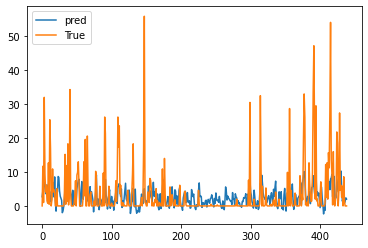

In [43]:
# 실제 예측
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)

46.7897877161508


### 선형보간법

In [45]:
df_sp2['temp_max'] = df_sp2['temp_max'].interpolate(method='linear')
df_sp2['temp_min'] = df_sp2['temp_min'].interpolate(method='linear')
df_sp2['wind'] = df_sp2['wind'].interpolate(method='linear')

In [46]:
df_sp2.isna().sum()

temp_max         0
temp_min         0
wind             0
precipitation    0
dtype: int64

In [47]:
x = df_sp2.drop('precipitation', axis=1)
y = df_sp2['precipitation']

# 분리 비율 설정
train_ratio = 0.7
test_ratio = 1 - train_ratio

# 데이터를 인덱싱과 슬라이싱을 사용하여 훈련 데이터와 테스트 데이터로 나누기
split_idx = int(len(df_sp1) * train_ratio)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 결과
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1022, 3)
x_test shape: (439, 3)
y_train shape: (1022,)
y_test shape: (439,)


In [48]:
import statsmodels.api as sm #회귀 분석에 필요한 모듈
import matplotlib.pyplot as plt # 시각화 모듈

In [49]:
fit_train2 = sm.OLS(y_train, x_train)
fit_train2 = fit_train2.fit()

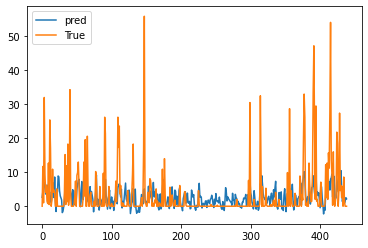

In [50]:
# 실제 예측
plt.plot(np.array(fit_train2.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train2.predict(x_test))
print(mse2)

46.69804998592046


## iterativeImputer

In [52]:
imputer = IterativeImputer(imputation_order = 'descending',
                          max_iter=10, random_state=111,
                          n_nearest_features=4)

df_sp3 =imputer.fit_transform(df_sp3)

C:\Users\kateb\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [53]:
# 반환값이 array 만듬
df_sp3

array([[12.8,  5. ,  4.7,  0. ],
       [10.6,  2.8,  4.5, 10.9],
       [11.7,  7.2,  2.3,  0.8],
       ...,
       [ 7.2,  0.6,  2.6,  0. ],
       [ 5.6, -1. ,  3.4,  0. ],
       [ 5.6, -2.1,  3.5,  0. ]])

In [54]:
#데이터프레임으로 변환
df_sp3= pd.DataFrame(df_sp3)

In [55]:
df_sp3.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [56]:
df_sp3

,0,1,2,3
0,12.8,5.0,4.7,0.0
1,10.6,2.8,4.5,10.9
2,11.7,7.2,2.3,0.8
3,12.2,5.6,4.7,20.3
4,8.9,2.8,6.1,1.3
...,...,...,...,...
1456,4.4,1.7,2.9,8.6
1457,5.0,1.7,1.3,1.5
1458,7.2,0.6,2.6,0.0
1459,5.6,-1.0,3.4,0.0


In [57]:
df_sp2.columns

Index(['temp_max', 'temp_min', 'wind', 'precipitation'], dtype='object')

In [58]:
df_sp3.columns = ['temp_max', 'temp_min', 'wind', 'precipitation']

In [59]:
df_sp3

,temp_max,temp_min,wind,precipitation
0,12.8,5.0,4.7,0.0
1,10.6,2.8,4.5,10.9
2,11.7,7.2,2.3,0.8
3,12.2,5.6,4.7,20.3
4,8.9,2.8,6.1,1.3
...,...,...,...,...
1456,4.4,1.7,2.9,8.6
1457,5.0,1.7,1.3,1.5
1458,7.2,0.6,2.6,0.0
1459,5.6,-1.0,3.4,0.0


In [60]:
x = df_sp3.drop('precipitation', axis=1)
y = df_sp3['precipitation']

# 분리 비율 설정
train_ratio = 0.7
test_ratio = 1 - train_ratio

# 데이터를 인덱싱과 슬라이싱을 사용하여 훈련 데이터와 테스트 데이터로 나누기
split_idx = int(len(df_sp1) * train_ratio)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 결과
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1022, 3)
x_test shape: (439, 3)
y_train shape: (1022,)
y_test shape: (439,)


In [61]:
fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

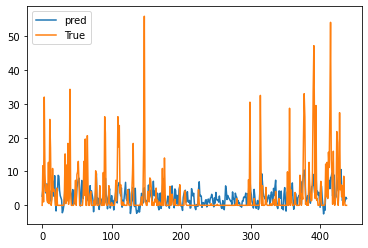

In [62]:
# 실제 예측
plt.plot(np.array(fit_train3.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

46.50146057480926


In [64]:
print(mse1, '단순평균대치법')
print(mse2, '선형보간법')
print(mse3, 'iterative imputer')

46.7897877161508 단순평균대치법
46.69804998592046 선형보간법
46.50146057480926 iterative imputer
